<a href="https://colab.research.google.com/github/proflynch/Tekbac/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN_MNIST

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist # Digits 0-9, 28x28= pixels
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Normalize the data.
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [4]:
# Add convolution layers
input_shape=(28,28,1)
inputs = tf.keras.layers.Input(shape=input_shape)    # The input layer.
layer = tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=(2,2), activation=tf.nn.relu)(inputs)
layer = tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=(2,2), activation=tf.nn.relu)(layer)
layer = tf.keras.layers.Flatten()(layer)
layer = tf.keras.layers.Dense(128, activation = tf.nn.relu)(layer)   # The 1st hidden layer with RELU activation. 
layer = tf.keras.layers.Dense(128, activation = tf.nn.relu)(layer)  # The 2nd hidden layer with RELU activation.
outputs = tf.keras.layers.Dense(10, activation = tf.nn.softmax)(layer) # The number of classifications with softmax activation.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
# Run the model.
model = tf.keras.Model(inputs, outputs)
model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 12, 12, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 64)          102464    
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290  

[[8.7267544e-08 1.4186395e-06 7.6125980e-06 ... 9.9959046e-01
  1.9717661e-06 1.2910753e-04]
 [1.0170758e-11 1.7028082e-10 1.0000000e+00 ... 1.6156848e-12
  2.6940693e-11 3.0336229e-13]
 [1.6987931e-05 9.9797171e-01 8.5559732e-05 ... 1.5336512e-04
  1.0713077e-03 2.1053947e-04]
 ...
 [5.8919891e-09 1.1726373e-06 7.0870790e-08 ... 4.0430864e-06
  3.3944625e-06 3.4300629e-06]
 [5.0222754e-10 2.0560775e-09 9.4593541e-11 ... 2.0705816e-11
  1.1092040e-06 1.7899945e-08]
 [5.8866055e-07 6.2209843e-08 2.6853238e-06 ... 2.8247471e-09
  4.6905711e-07 6.5272630e-08]]
9


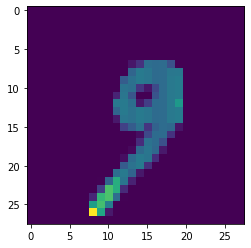

In [6]:
x = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
predictions = model.predict([x_test])
print(predictions)
import numpy as np
index = 1000
print(np.argmax(predictions[index]))
plt.imshow(x_test[index].reshape((28,28)))
plt.show()